In [9]:
import cirq
import numpy as np
import sympy
from qiskit import *
from qiskit.circuit import QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt

from qiskit.visualization import plot_distribution

import server

server = server.Server()

In [3]:
def plot(res):
    Convert keys to integers and sort them
    keys_as_int = sorted(map(int, res.keys()))

    # Convert integers to binary representation in big endian
    binary_labels = [format(key, '03b') for key in keys_as_int]
    print(binary_labels)

    # Extract corresponding values
    values = [res[str(key)] for key in keys_as_int]

    # Plotting
    plt.bar(binary_labels, values)
    plt.xlabel('Binary Number (Big Endian)')
    plt.ylabel('Value')
    plt.title('Histogram of Result Object')
    plt.show()

    binary_dict = {bin(int(key))[2:]: value for key, value in res.items()}
    return binary_dict
    # print(binary_dict)
    plot_histogram(binary_dict)

In [4]:
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit(
    cirq.X(q1),
    # cirq.CNOT(q0, q1),
    cirq.measure(q0, q1, key='result')
)
print(circuit)

0: ───────M('result')───
          │
1: ───X───M─────────────


In [5]:
cq = cirq.Circuit()
# for i in range(12):
#     cq.append(cirq.H.on(cirq.LineQubit(i)))

cq.append(cirq.X.on(cirq.LineQubit(0)))

test_probe = cirq.qasm(cq)
print(test_probe)

// Generated from Cirq v1.3.0

OPENQASM 2.0;
include "qelib1.inc";


// Qubits: [q(0)]
qreg q[1];


x q[0];



In [6]:
# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

# Print the result histogram
print(result.histogram(key='result'))

Counter({1: 1000})


In [41]:
res = server.probe(vault_index=9, circuit=test_probe)

In [35]:
print(res)

{'0': 0.005, '1': 0.075, '2': 0.16, '3': 0.76}


In [18]:
res2 = {}
for key, val in res.items():
    if val > 0.005:
        res2[key] = val


In [7]:
res = {'0': 0.005, '1': 0.075, '2': 0.16, '3': 0.76}
print(res)

{'0': 0.005, '1': 0.075, '2': 0.16, '3': 0.76}


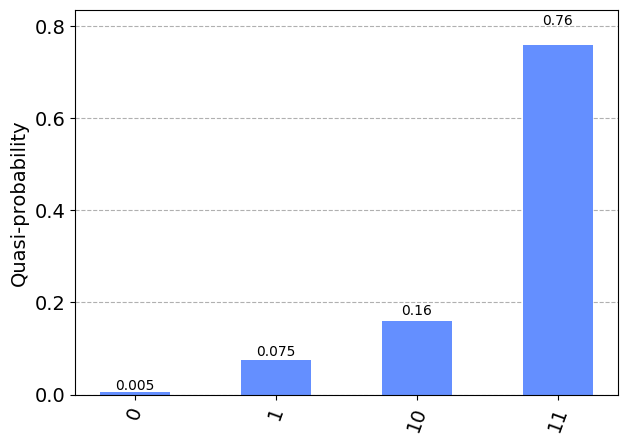

In [11]:
display(plot_distribution(plot(res)))

In [ ]:
server.state()

In [ ]:
obj = {'0': 0.23, '1': 0.22, '2': 0.02, '3': 0.135, '4': 0.035, '5': 0.005, '6': 0.01, '7': 0.04, '8': 0.095, '9': 0.045, '10': 0.05, '11': 0.05, '12': 0.015, '13': 0.01, '14': 0.03, '15': 0.01}

for val in obj.values():
    print(str(val) + ',\n')